In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
Twitter = pd.read_csv('Desktop/Twitter.csv') 
del Twitter['Unnamed: 0']

In [3]:
CellC = (Twitter.loc[Twitter['company_name'] == 'cellc'])

In [4]:
CellC.head()

,company_name,tweet_id,tweet,in_reply_to,created_at
1140014,cellc,5.198396e+17,@achmathassiem Hi Achmat. Could you please giv...,achmathassiem,Wed Oct 08 13:19:49 +0000 2014
1140015,cellc,1.024191e+18,Tired of being taken for a data ride? Switch t...,NaN,Tue Jul 31 07:12:27 +0000 2018
1140016,cellc,4.198348e+17,Lions need 141 to win this #RamSlam game. Let'...,NaN,Sun Jan 05 14:16:21 +0000 2014
1140017,cellc,9.260870e+17,The contestants are feeling the heat with ever...,NaN,Thu Nov 02 14:01:50 +0000 2017
1140018,cellc,1.050825e+18,@DineoMotau5 👌 https://t.co/7z7vIVrvUu,DineoMotau5,Fri Oct 12 19:04:55 +0000 2018


In [5]:
def generate_ngrams(text, n=None):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

In [6]:
#making tweets lower case
CellC['tweet'] = CellC['tweet'].apply(lambda x:x.lower())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
CellC.head()

,company_name,tweet_id,tweet,in_reply_to,created_at
1140014,cellc,5.198396e+17,@achmathassiem hi achmat. could you please giv...,achmathassiem,Wed Oct 08 13:19:49 +0000 2014
1140015,cellc,1.024191e+18,tired of being taken for a data ride? switch t...,NaN,Tue Jul 31 07:12:27 +0000 2018
1140016,cellc,4.198348e+17,lions need 141 to win this #ramslam game. let'...,NaN,Sun Jan 05 14:16:21 +0000 2014
1140017,cellc,9.260870e+17,the contestants are feeling the heat with ever...,NaN,Thu Nov 02 14:01:50 +0000 2017
1140018,cellc,1.050825e+18,@dineomotau5 👌 https://t.co/7z7vivrvuu,DineoMotau5,Fri Oct 12 19:04:55 +0000 2018


In [8]:
ngrams = {}
for tweet in CellC['tweet']:
        for ngram in generate_ngrams(tweet,n=1):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_ = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_.columns = ['count']
ngrams_.reset_index(level=0, inplace=True)

In [9]:
ngrams_.head()

,index,count
0,@achmathassiem,1
1,hi,199
2,achmat.,1
3,could,311
4,you,3156


In [10]:
from textblob import TextBlob
import seaborn as sns

In [11]:
bloblist_desc = list()

In [12]:
df_usa_descr_str = ngrams_['index'].astype(str)

In [13]:
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

In [14]:
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [15]:
df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

In [16]:
CellC = df_usa_polarity_desc

In [17]:
CellC.head()

,sentence,sentiment,polarity,Sentiment_Type
0,@achmathassiem,0.0,0.0,Neutral
1,hi,0.0,0.0,Neutral
2,achmat.,0.0,0.0,Neutral
3,could,0.0,0.0,Neutral
4,you,0.0,0.0,Neutral


In [18]:
CellC.Sentiment_Type.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [19]:
CellC.head()

,sentence,sentiment,polarity,Sentiment_Type
0,@achmathassiem,0.0,0.0,Neutral
1,hi,0.0,0.0,Neutral
2,achmat.,0.0,0.0,Neutral
3,could,0.0,0.0,Neutral
4,you,0.0,0.0,Neutral


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(CellC, test_size=0.1)
print(train.shape)
print(test.shape)

# Removing the neutral sentiments
train = train[train.Sentiment_Type !='Neutral']
print(train.Sentiment_Type.ravel())
print(set(train.Sentiment_Type))

(18939, 4)
(2105, 4)
['Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positi

In [22]:
train_pos = train[ train['Sentiment_Type']=='Positive']
train_pos = train_pos['sentence']
train_neg = train[ train['Sentiment_Type'] == 'Negative']
train_neg = train_neg['sentence']

In [23]:
from scipy.misc import imread

In [24]:
mask = imread("Desktop/twitter_mask.png", flatten=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [25]:
def draw_wordcloud(data, color = 'black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                          and not word.startswith('@')
                          and not word.startswith('#')
                          and word !='RT'
                      ])
    wordcloud = WordCloud(
                         background_color=color,
                         colormap='magma',
                         width=2500,
                         mask = mask, 
                         height=2000,collocations=False
                         ).generate_from_text(str(cleaned_word))
    plt.figure(1, figsize=(13, 13))
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


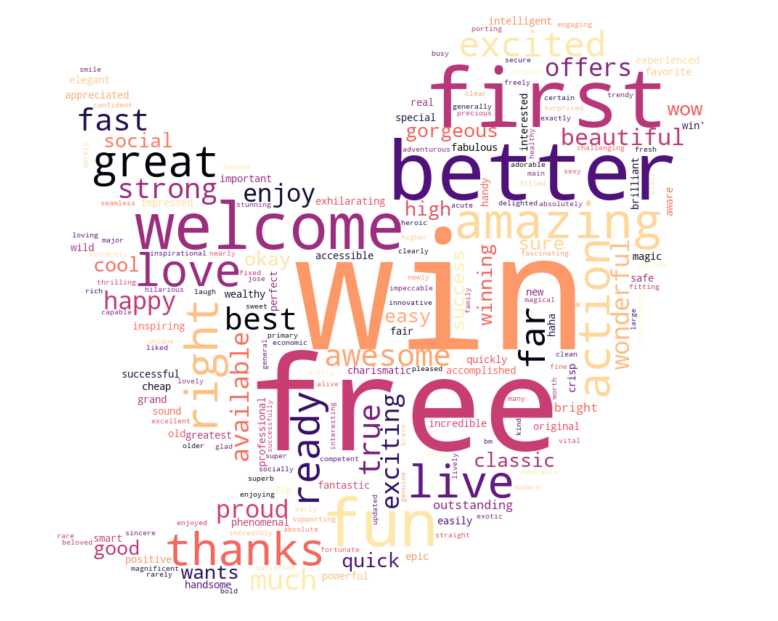

In [26]:
draw_wordcloud(train_pos, 'white')
plt.savefig('Positive.png')

/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


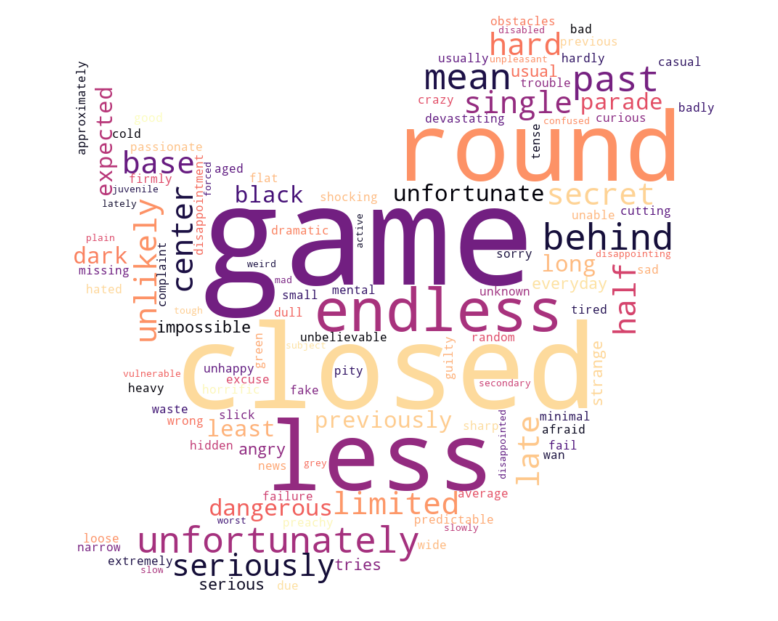

In [27]:
#print('Negtive words cloud')
draw_wordcloud(train_neg, 'white')

In [28]:
import nltk
from nltk.corpus import stopwords
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
import re
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 

In [29]:
finder = BigramCollocationFinder.from_words(train_pos)

In [30]:
bigram_measures = BigramAssocMeasures()

In [31]:
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [32]:
scoredList = sorted(scored, key=itemgetter(1), reverse=True)

In [33]:
word_dict = {}
 
listLen = len(scoredList)
 
# Get the bigram and make a contiguous string for the dictionary key. 
# Set the key to the scored value. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


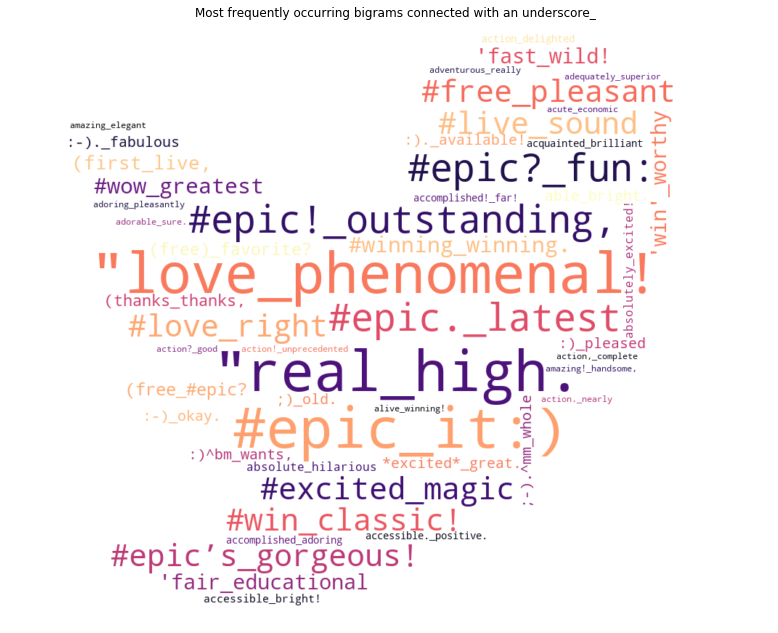

In [34]:
WC_height = 2500
WC_width = 2000
WC_max_words = 50
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, 
                      width=WC_width,
                      background_color='white',
                         colormap='magma',
                         mask = mask)
 
wordCloud.generate_from_frequencies(word_dict)
plt.figure(1, figsize=(13, 13))
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()